# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [160]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [161]:
browser = Browser('chrome')

The chromedriver version (123.0.6312.122) detected in PATH at /opt/homebrew/bin/chromedriver might not be compatible with the detected chrome version (124.0.6367.61); currently, chromedriver 124.0.6367.60 is recommended for chrome 124.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [162]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [163]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [164]:
# Extract all rows of data
table = soup.find('table', class_ = 'table')

In [165]:
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [166]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
title_row = table.find_all('th')
titles = [title.text for title in title_row]

rows = table.find_all('tr', class_ = 'data-row')
for row in rows:
    data_elements = row.find_all('td')
    row_data = [d.text for d in data_elements]
    data.append(row_data)

In [167]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=titles)

In [168]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [169]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [170]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = pd.to_numeric(df['sol'])
df['ls'] = pd.to_numeric(df['ls'])
df['month'] = pd.to_numeric(df['month'])
df['min_temp'] = pd.to_numeric(df['min_temp'])
df['pressure'] = pd.to_numeric(df['pressure'])

In [171]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [172]:
# 1. How many months are there on Mars?
months = df.groupby('month')['month'].count()
months

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

### QUESTION 1
*How many months are there on Mars?*


The above ```groupby()``` function was used to show all the months in Mars. We could have also used the ```unique``` or ```nunique``` function to find the number of Martian Months. Assusmption: There is no large missing chunks of data in the Curiosity Rover. 

In [173]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].count()
martian_days

1867

### QUESTION 2
*How many Martian days' worth of data are there?*

This is essentially the number of records in the dataframe. This can be identified by counting the 'sol' column as shown above. It can also be identified by ```.shape``` and ```len``` of dataframe. Assumption: There is no repetetive data in the dataframe. This can be identified using the ```.duplicated()``` function.

In [174]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = df.groupby('month')['min_temp'].mean('min_temp')
avg_low_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

### QUESTION 3
*What is the average low temperature by month?*

This is calculated by finding the mean of the 'min_temp' column data having grouped for by 'month'. By sorting the data the bar chart is able to quickly show the average temperature range. The coldest month is the 3rd month and the warmest month is the 8th month.

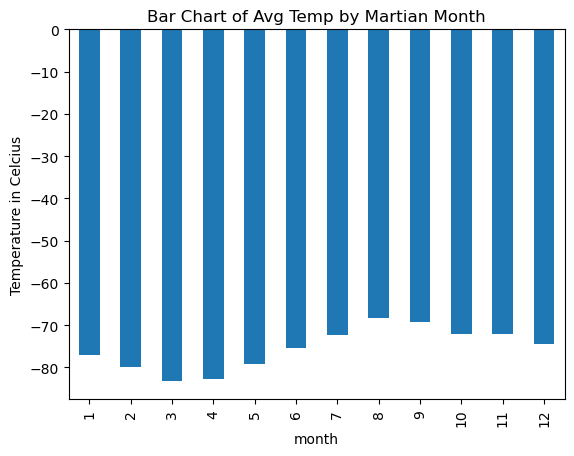

In [175]:
# Plot the average temperature by month

ax = avg_low_temp_by_month.plot.bar()

# Formatiing and saving the file
ax.set(ylabel = 'Temperature in Celcius');
plt.title("Bar Chart of Avg Temp by Martian Month")
plt.savefig('output/Bar Chart - Avg temp by Martian Month.png')


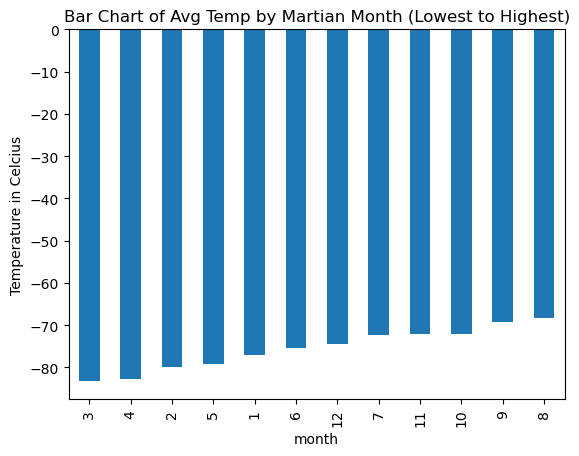

In [176]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_by_month = avg_low_temp_by_month.sort_values(ascending=True)
ax = avg_low_temp_by_month.plot.bar()

# Formatiing and saving the file
ax.set(ylabel = 'Temperature in Celcius');
plt.title("Bar Chart of Avg Temp by Martian Month (Lowest to Highest)")
plt.savefig('output/Bar Chart - Avg temp by Martian Month (Lowest to Highest).png')


In [177]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean('pressure')
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

### QUESTION 4
*Average pressure by Martian month*

This is calculated by finding the mean of the 'pressure' column data having grouped for by 'month'. 

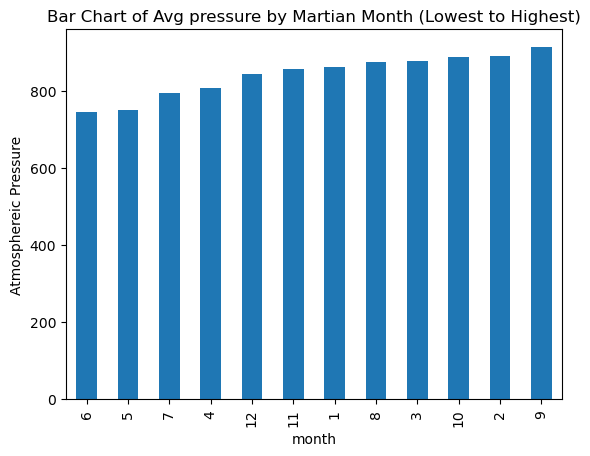

In [178]:
# Plot the average pressure by month
avg_pressure_by_month = avg_pressure_by_month.sort_values(ascending=True)
ax = avg_pressure_by_month.plot.bar()

# Formatiing and saving the file
ax.set(ylabel = 'Atmosphereic Pressure');
plt.title("Bar Chart of Avg pressure by Martian Month (Lowest to Highest)")
plt.savefig('output/Bar Chart - Avg pressure by Martian Month (Lowest to Highest).png')

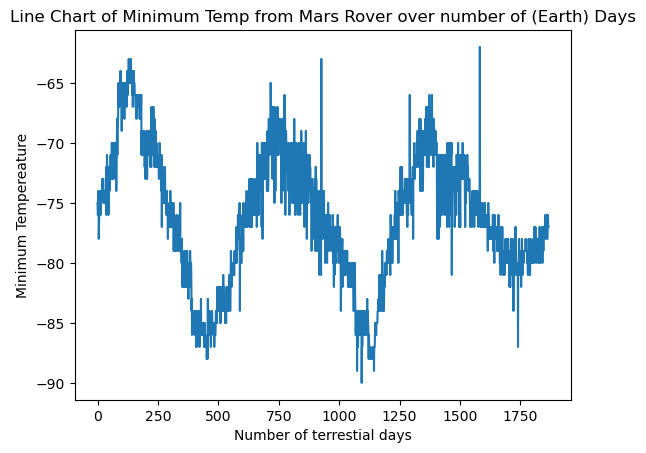

In [185]:
# 5. How many terrestrial (earth) days are there in a Martian year?
temp_range = df['min_temp']
ax = temp_range.plot.line()

# Formatiing and saving the file
ax.set(ylabel = 'Minimum Tempereature', xlabel= 'Number of terrestial days');
plt.title("Line Chart of Minimum Temp from Mars Rover over number of (Earth) Days")
plt.savefig('output/Line Chart - Min Temp over Terrestrial days.png')


In [180]:
condition1 = df['month']==6
condition2 = df['sol']==10
x = df[condition1 & condition2]
print(x)

  id terrestrial_date  sol   ls  month  min_temp  pressure
0  2       2012-08-16   10  155      6     -75.0     739.0


### QUESTION 5
*How many terrestrial (earth) days are there in a Martian year?*

This can be calculated if we had two data points at the beginning and the end of 1 martain year. The equivalent earth year date can be read and the duration between these points in earth days would have given the required value. However we have gone for a graphical estimatation of the data using the generated line chart above. We make the assumption that the lowest and highest temperature day come at some time every year. By looking a the interval between these peak (or trough) points an estimate can be gathered for the number of earth days a Martian year is equal to.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [181]:
# Write the data to a CSV
df.to_csv('resources/mars_weather.csv', index=False)

In [182]:
browser.quit()